In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2112000)

In [49]:
# Images are generated in batches of 10. Endings 0 - 5 are training set,
# 6 - 7 are validation set, 8 - 9 are test set.

# PATH_BASE = '../RAVEN_DS/RAVEN-F/'
# PATH_BASE = '../RAVEN_DS/RAVEN/'

PATH_BASE = '../COCO_RAVEN/RAVEN-F/'
# PATH_BASE = '../COCO_RAVEN/RAVEN-F/'

TYPE = {
    'center' : 'center_single',
    '2x2' : 'distribute_four',
    '3x3' : 'distribute_nine',
    'contains_single' : 'in_center_single_out_center_single',
    'contains_grid' : 'in_distribute_four_out_center_single',
    'lr' : 'left_center_single_right_center_single',
    'tb' : 'up_center_single_down_center_single'
}

TYPES = ['center', '2x2', '3x3', 'contains_single', 'contains_grid', 'lr', 'tb']

In [50]:
def pick_image(
        type : str = 'center',
        n : int = 0,
        random : bool = False
):
    '''
    Picks an Image based on the constants defined above and returns the file path.
    
    If `random=True`, picks random image and prints the selected parameters to stdout.

    If no parameters are given, returns the file path of center-0.
    '''
    if random:
        type = np.random.choice(TYPES)
        n = np.random.randint(0, 10000)
        print(f'Chosen Image: {type}-{n}.')

    suffix = '.npz'
    
    return PATH_BASE + TYPE[type] + '/RAVEN_' + str(n) + suffix


def show_matrix(
        file : np.lib.npyio.NpzFile
):
    '''
    Takes a loaded NpzFile and arranges the stimulus images in a matrix missing the [2][2] cell.
    '''
    fig, axs = plt.subplots(3, 3)                           # Create grid
    for image_id in range(8):                               # Matrix stimulus has 8 images
        row = image_id // 3
        col = image_id % 3                                  # Locate position for image
        ax = axs[row][col]
        ax.imshow(file['image'][image_id], cmap = 'gray')   # Set image on position
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)                         # Remove axis labels
    axs[2][2].remove()                                      # Remove empty 9th image slot.
    plt.show()

def show_aopt(
        file: np.lib.npyio.NpzFile
):
    '''
    Takes a loaded NpzFile and arranges the anser options in a 2x4 grid.
    '''
    fig_opt, axs_opt = plt.subplots(2, 4)
    for image_id in range(8, 16):
        img = file['image'][image_id]                       # Pick image
        image_id -= 8                                       # Then reduce image_id to function as locator
        row = image_id // 4
        col = image_id % 4                                  # Locate position for image
        ax = axs_opt[row][col]
        ax.imshow(img, cmap = 'gray')                       # Set image on position
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)                         # Remove axis labels
    plt.show()


with np.load(pick_image()) as file:
    # print(file)
    print(file.files)
    # for key in file.files:
        # print(file[key])

['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']


### What to make of `file['image']`

Chosen Image: tb-2771.


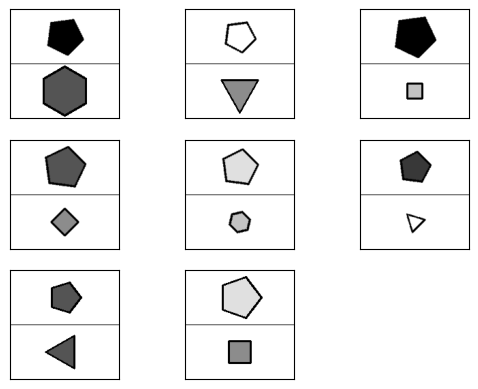

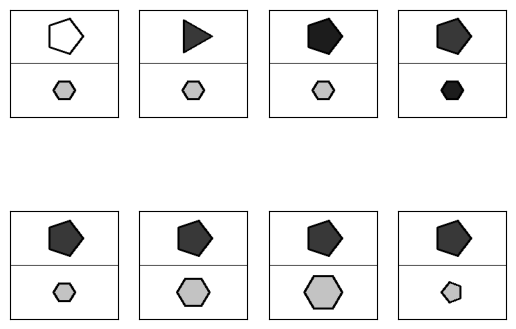

target: 5
predict: [4]


In [51]:
with np.load(pick_image(random=True)) as file:
    show_matrix(file)

    show_aopt(file)    

    print(f'target: {file["target"] + 1}')                  # Target is Index, this makes it easier to understand
    print(f'predict: {file["predict"]}')                    # Since predict[0] == target, this shows the original

In [52]:
while True:
    with np.load(pick_image(random=True)) as file:
        try:
            assert file['target'] in range(1, 8), 'target outside range!'
        except AssertionError as msg:
            print(msg)
            print(f'Target was: {file["target"]}')
            break

# -> The Target is a standard index ranging from 0 to 7.
        

Chosen Image: 3x3-9296.
Chosen Image: contains_grid-3526.
Chosen Image: contains_single-3973.
Chosen Image: tb-7024.
Chosen Image: contains_grid-3026.
Chosen Image: 2x2-3146.
Chosen Image: center-9619.
target outside range!
Target was: 0


## Are there usable annotations already in the dataset?

In [53]:
import xmltodict
from pprint import pprint

def get_xml(path : str):
    '''
    Get corresponding xml file for `.npz` archive.
    
    PARAMETERS
    ----------
    path : file path ending in `.npz`

    RETURNS
    -------
    xml : dict
    '''
    xml_path = path[:-4] + '.xml'

    with open(xml_path, 'r') as file:
        xml_file = file.read()
    
    dict = xmltodict.parse(xml_file)

    return dict

Chosen Image: contains_single-7961.


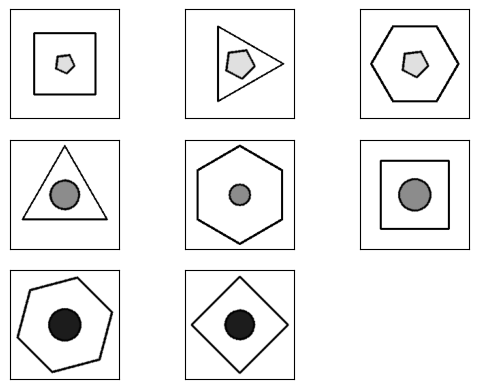

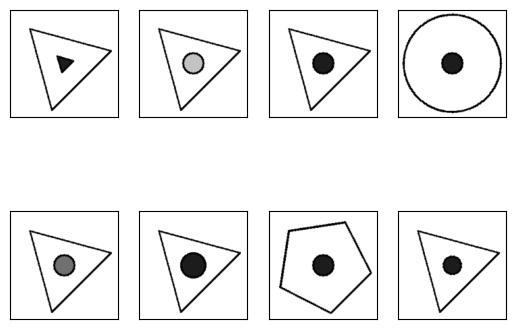

In [70]:
image_path = pick_image(random=True)
with np.load(image_path) as file:
    show_matrix(file)
    show_aopt(file)

In [71]:
with np.load(image_path) as file:
    print(file['image'][0].shape)

pprint(
    get_xml(image_path),
    indent = 1
)

(160, 160)
{'Data': {'Panels': {'Panel': [{'Struct': {'@name': 'Out_In',
                                           'Component': [{'@id': '0',
                                                          '@name': 'Out',
                                                          'Layout': {'@Number': '0',
                                                                     '@Position': '[[0.5, '
                                                                                  '0.5, '
                                                                                  '1, '
                                                                                  '1]]',
                                                                     '@Uniformity': '0',
                                                                     '@name': 'Out_Center_Single',
                                                                     'Entity': {'@Angle': '1',
                                                        